<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
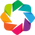

In [1]:
#Basic necessary Libraries
import numpy as np
import pandas as pd

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import altair as alt
import plotly.express as px
from wordcloud import WordCloud,STOPWORDS
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

#Apriori libraries 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
groceries = pd.read_excel('final_data.xlsx')
groceries

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


,NO.TRANSAKSI,DATE,DESCRIPTION,QTY
0,2301011000001,2023-01-01,MADU NSTR SUPER 650ML.,1
1,2301011000001,2023-01-01,STELLA MTC F/C 225ML.REF /12,1
2,2301011000001,2023-01-01,GELAS KOPI BOLA@50,2
3,2301011000001,2023-01-01,MIKA BX IV,3
4,2301011000002,2023-01-01,LAGIE GOLD CM 75G.W/30 LG07507,2
...,...,...,...,...
21929,2312311020099,2023-12-31,INDOMIE SOTO MIE/40 SM,1
21930,2312311020099,2023-12-31,INDOMIE KARI AYAM/40 IKA,1
21931,2312311020099,2023-12-31,INDOMIE KALDU AYAM/40 KA75,3
21932,2312311020099,2023-12-31,SEDAAP MIE KOREAN SPCY40-20234,1


In [3]:
groceries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21934 entries, 0 to 21933
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   NO.TRANSAKSI  21934 non-null  int64         
 1   DATE          21934 non-null  datetime64[ns]
 2   DESCRIPTION   21934 non-null  object        
 3   QTY           21934 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 685.6+ KB


In [4]:
#Renaming the columns to simple words
groceries.rename(columns = {'NO.TRANSAKSI':'id','DESCRIPTION':'item'}, inplace = True)

In [5]:
#Convert the 'Date' column to datetime format
groceries['DATE']= pd.to_datetime(groceries['DATE'])
 
#Extracting year,month and day
groceries['year'] = groceries['DATE'].apply(lambda x : x.year)
groceries['month'] = groceries['DATE'].apply(lambda x : x.month)
groceries['day'] = groceries['DATE'].apply(lambda x : x.day)
groceries['weekday'] = groceries['DATE'].apply(lambda x : x.weekday())

#Rearranging the columns
groceries=groceries[['id', 'DATE','year', 'month', 'day','weekday','item']]
groceries.head()

,id,DATE,year,month,day,weekday,item
0,2301011000001,2023-01-01,2023,1,1,6,MADU NSTR SUPER 650ML.
1,2301011000001,2023-01-01,2023,1,1,6,STELLA MTC F/C 225ML.REF /12
2,2301011000001,2023-01-01,2023,1,1,6,GELAS KOPI BOLA@50
3,2301011000001,2023-01-01,2023,1,1,6,MIKA BX IV
4,2301011000002,2023-01-01,2023,1,1,6,LAGIE GOLD CM 75G.W/30 LG07507


In [6]:
#Creating temporary data which has quantity purchased column
temp=groceries.copy()
temp['qty_purchased']=groceries['id'].map(groceries['id'].value_counts())

#Creating sparse matrix 
basket = (temp.groupby(['id', 'item'])['qty_purchased']
          .sum().unstack().reset_index().fillna(0)
          .set_index('id'))

#Eoding the quantity urchased
def encode(x):
    '''Encoding the quantity of products with 0s and 1s
    0:when qty is less than or equal to 0
    1:when qty is greater than or equal to 1'''
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
#Appying on our data
basket_sets = basket.applymap(encode)
basket_sets

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5984\2613186608.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode)


item,3M MASKER RESPIRATOR@1/20.3283,ABC ALK A2-2 LR06-2B+1B 5078,ABC ALK LR03 4B+2B/72 2184,ABC ALK LR06 2B MP/12 484,ABC ALK LR06 4B+2R9/72 2183,ABC ALKALINE A2-4 LR6/72 4149,ABC ALKALINE A3-2 LR03 5079,ABC BAT BIRU CZ R20/12 456,ABC BAT BIRU R14-2/72 457,ABC BAT BIRU R6-12/24 480,...,ZWITSAL BB MYK TLON 250ML. /12,ZWITSAL BB NAT M.TELON 60ML,ZWITSAL COL FLO KISS 100/24.32,ZWITSAL EAU DE TOILETTE 100/12,ZWITSAL H/LOT ALOE V.200ML /18,ZWITSAL HAIR LOT ALMD.100ML/24,ZWITSAL SHP ALOE 100ML /36,ZWITSAL SOAP 4X70G/36 67557840,ZWITSAL SOAP CLSS.70G/144.7872,ZWITSAL SOAP R/HONEY 70G. /144
id,,,,,,,,,,,,,,,,,,,,,
2301011000001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2301011000002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2301011000003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2301011000004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2301011000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312311020095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2312311020096,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2312311020097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Apriori- Support70%
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)

#Associaton rules-using lift
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.tail()

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

In [12]:
#Customizable function to change the lift and confidence
def rules_mod(lift,confidence):
    '''rules_mod is a function to control the rules 
    based on lift and confidence threshold'''
    return rules[ (rules['lift'] >= lift) &
      (rules['confidence'] >= confidence) ]

#Calling function
rules_mod(0.7,0.2)

NameError: name 'rules' is not defined

In [13]:
#Setting up the style
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')
#Plotting the relationship between the metrics
plt.subplot(221)
sns.scatterplot(x="support", y="confidence",data=rules)
plt.subplot(222)
sns.scatterplot(x="support", y="lift",data=rules)
plt.subplot(223)
sns.scatterplot(x="confidence", y="lift",data=rules)
plt.subplot(224)
sns.scatterplot(x="antecedent support", y="consequent support",data=rules)

OSError: 'seaborn-white' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

<Figure size 1500x1500 with 0 Axes>

In [ ]:
# a function to build a network diagram connecting antecedents and consequents
def draw_graph(rules, rules_to_show):
  import networkx as nx  
  G1 = nx.DiGraph()
   
  color_map=[]
  N = 50
  colors = np.random.rand(N)    
  strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
   
  for i in range (rules_to_show):      
    G1.add_nodes_from(["R"+str(i)])
    
     
    for a in rules.iloc[i]['antecedents']:
                
        G1.add_nodes_from([a])
        
        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
    for c in rules.iloc[i]['consequents']:
             
            G1.add_nodes_from([a])
            
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
  for node in G1:
       found_a_string = False
       for item in strs: 
           if node==item:
                found_a_string = True
       if found_a_string:
            color_map.append('yellow')
       else:
            color_map.append('green')       
 
 
   
  edges = G1.edges()
  colors = [G1[u][v]['color'] for u,v in edges]
  weights = [G1[u][v]['weight'] for u,v in edges]
 
  pos = nx.spring_layout(G1, k=16, scale=1)
  nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
  for p in pos:  # raise text positions
           pos[p][1] += 0.07
  nx.draw_networkx_labels(G1, pos)
  plt.show()

#Calling function with 10 rules
draw_graph(rules, 10)